### 타이타닉 승객 정보 데이터셋을 이용한 생존 여부 예측
- 각 승객 정보(이름, 성별, 나이, 티켓 번호 등)을 활용
- 로지스틱 회귀모델을 이용

In [1]:
import pandas as pd  # 판다스 라이브러리 임포트
file_url =  'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
df = pd.read_csv(file_url)  # 데이터셋 df 읽기

df.head(10)  # 위에서 10번째 데이터 읽기

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
5,3,"Moran, Mr. James",male,28.0,0,0,330877,Q,0
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,S,0
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,S,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,S,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,C,1


In [2]:
# 통계 정보 출력
df.describe()

# 클래스 3가지 , 75%가 35세 미만, 대부분 혼자 여행

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [3]:
# 피어슨 상관관계 출력
# df.select_dtypes(include='number').corr()

In [4]:
#상관관계 코드를 변수로 
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

            Pclass       Age     SibSp     Parch  Survived
Pclass    1.000000 -0.336512  0.081656  0.016824 -0.335549
Age      -0.336512  1.000000 -0.232543 -0.171485 -0.069822
SibSp     0.081656 -0.232543  1.000000  0.414542 -0.034040
Parch     0.016824 -0.171485  0.414542  1.000000  0.083151
Survived -0.335549 -0.069822 -0.034040  0.083151  1.000000


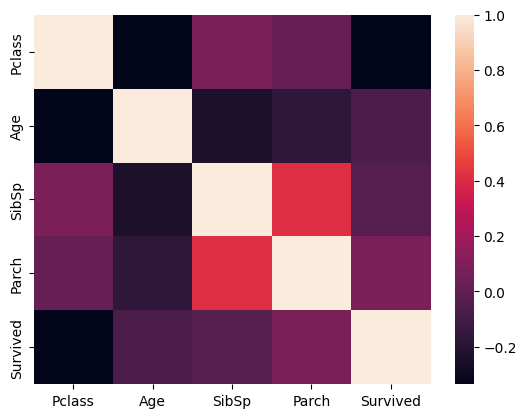

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix)   # 히트맵 생성
plt.show()

<Axes: >

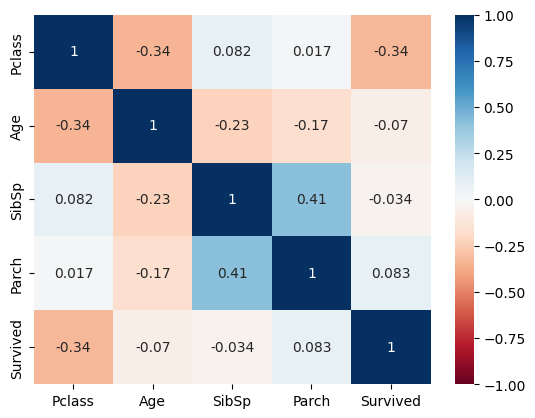

In [6]:
sns.heatmap(correlation_matrix, cmap = 'RdBu', vmin=-1, vmax=1, annot=True)
# 양=뜨신 색 음=찬 색, 파라미터 최솟값과 최댓값 설정, 셀의 값 텍스트 형태 표시 O)

In [7]:
# 범주형 변수 변환 (더미 변수와 원-핫 인코딩)

df = df.drop(['Name','Ticket'], axis=1)
# 열 방향으로 삭제

df = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = True)
#더미한 값을 df에 저장하기 / 첫번째 카테고리에 해당하는 더미 변수 삭제 - 다중공선성

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Survived    889 non-null    int64  
 5   Sex_male    889 non-null    bool   
 6   Embarked_Q  889 non-null    bool   
 7   Embarked_S  889 non-null    bool   
dtypes: bool(3), float64(1), int64(4)
memory usage: 37.5 KB


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis = 1) # 데이터셋에서 종속변수 제거 후 저장
y = df['Survived']                # 데이터셋에서종속변수만저장
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) # 학습셋, 시험셋 분리
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 임포트
model = LogisticRegression() # 로지스틱 회귀 모델 생성
model.fit(X_train, y_train) # 모델 학습
pred = model.predict(X_test) # 예측
from sklearn.metrics import accuracy_score # 정확도 라이브러리 임포트
accuracy_score(y_test, pred) # 실젯값과 예측값으로 정확도 계산

0.7808988764044944

In [10]:
model.coef_
# 로지스틱 회귀 모델의 계수
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.182269
Age          -0.039923
SibSp        -0.321323
Parch         0.007930
Sex_male     -2.568671
Embarked_Q   -0.078756
Embarked_S   -0.235564
dtype: float64

In [12]:
# 객실 등급이 높을 수록 생존확률 높
# 나이 많은 수록 생존확률 낮
# 가족 많을 수록 생존확률 낮
# 남성일수록 생존확률 낮
# Q 항구에 탑승한 경우 생존확률 낮
# S 항구에 탑승한 경우 생존확률 낮

# 로짓값이 1에 가까울수록 해당 특성이 생존확률에 미치는 영향이 큼 
# 1에 가까운 양수 : 생존 확률이 크게 증가
# 1에 가까운 음수 : 생존 확률이 크게 감소     -> Sex_male 절댓값이 가장 크므로 생존확률에 영향 다수 미침

In [11]:
df['family'] = df['SibSp'] + df['Parch']  # 변수 합치기
df.drop(['SibSp', 'Parch'], axis = 1, inplace= True) # 합친 변수 삭제
df.head(10)

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,True,False,True,1
1,1,38.0,1,False,False,False,1
2,3,26.0,1,False,False,True,0
3,1,35.0,1,False,False,True,1
4,3,35.0,0,True,False,True,0
5,3,28.0,0,True,True,False,0
6,1,54.0,0,True,False,True,0
7,3,2.0,0,True,False,True,4
8,3,27.0,1,False,False,True,2
9,2,14.0,1,False,False,False,1


In [23]:
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 100) # 학습셋, 시험셋 준비
model = LogisticRegression() # 모델 생성
model.fit(X_train, y_train) # 학습
pred = model.predict(X_test) # 예측
accuracy_score(y_test, pred) # 정확도 계산

0.7921348314606742